<a href="https://colab.research.google.com/github/Taj1920/Data_Analysis/blob/main/Zomato_analysis/Zomato_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

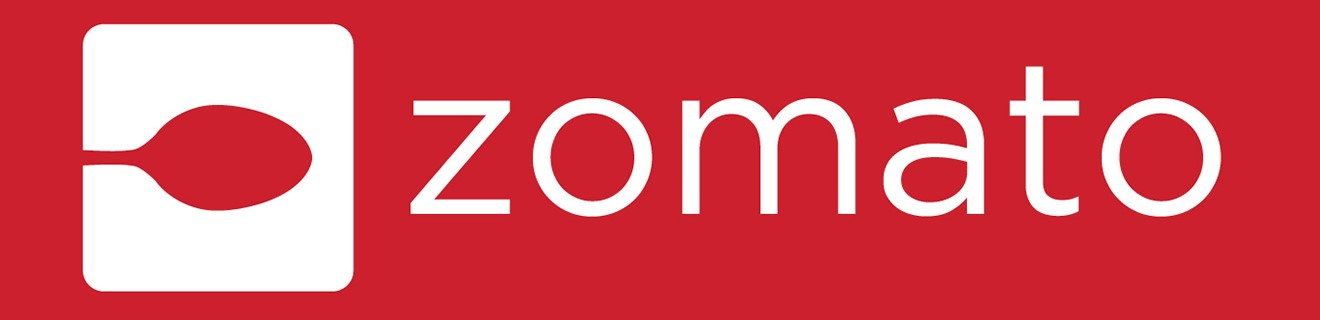

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Loading the Zomato Dataset
df = pd.read_excel('zomato_rest_data.xlsx')
df

,Unnamed: 0,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51712,51712,https://www.zomato.com/bangalore/best-brews-fo...,"Four Points by Sheraton Bengaluru, 43/3, White...",Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6 /5,27,080 40301477,Whitefield,Bar,NaN,Continental,"1,500","[('Rated 5.0', ""RATED\n Food and service are ...",[],Pubs and bars,Whitefield
51713,51713,https://www.zomato.com/bangalore/vinod-bar-and...,"Number 10, Garudachar Palya, Mahadevapura, Whi...",Vinod Bar And Restaurant,No,No,NaN,0,+91 8197675843,Whitefield,Bar,NaN,Finger Food,600,[],[],Pubs and bars,Whitefield
51714,51714,https://www.zomato.com/bangalore/plunge-sherat...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,NaN,0,NaN,Whitefield,Bar,NaN,Finger Food,"2,000",[],[],Pubs and bars,Whitefield
51715,51715,https://www.zomato.com/bangalore/chime-sherato...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3 /5,236,080 49652769,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,"2,500","[('Rated 4.0', 'RATED\n Nice and friendly pla...",[],Pubs and bars,Whitefield


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Unnamed: 0                   51717 non-null  int64 
 1   url                          51717 non-null  object
 2   address                      51717 non-null  object
 3   name                         51717 non-null  object
 4   online_order                 51717 non-null  object
 5   book_table                   51717 non-null  object
 6   rate                         43942 non-null  object
 7   votes                        51717 non-null  int64 
 8   phone                        50509 non-null  object
 9   location                     51696 non-null  object
 10  rest_type                    51490 non-null  object
 11  dish_liked                   23639 non-null  object
 12  cuisines                     51672 non-null  object
 13  approx_cost(for two people)  51

In [4]:
#Removing the unwanted columns
df.drop(['Unnamed: 0','url','address','phone','menu_item','reviews_list','dish_liked'],axis=1,inplace=True)
df

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...
51712,Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6 /5,27,Whitefield,Bar,Continental,"1,500",Pubs and bars,Whitefield
51713,Vinod Bar And Restaurant,No,No,NaN,0,Whitefield,Bar,Finger Food,600,Pubs and bars,Whitefield
51714,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,NaN,0,Whitefield,Bar,Finger Food,"2,000",Pubs and bars,Whitefield
51715,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3 /5,236,"ITPL Main Road, Whitefield",Bar,Finger Food,"2,500",Pubs and bars,Whitefield


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         51717 non-null  object
 1   online_order                 51717 non-null  object
 2   book_table                   51717 non-null  object
 3   rate                         43942 non-null  object
 4   votes                        51717 non-null  int64 
 5   location                     51696 non-null  object
 6   rest_type                    51490 non-null  object
 7   cuisines                     51672 non-null  object
 8   approx_cost(for two people)  51371 non-null  object
 9   listed_in(type)              51717 non-null  object
 10  listed_in(city)              51717 non-null  object
dtypes: int64(1), object(10)
memory usage: 4.3+ MB


In [6]:
#Renaming the columns
d={'approx_cost(for two people)':'costfor2','listed_in(type)':'type'}
df.rename(columns=d,inplace=True)
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,costfor2,type,listed_in(city)
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari


In [7]:
#Removing duplicate rows
df.drop_duplicates(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51609 entries, 0 to 51716
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   name             51609 non-null  object
 1   online_order     51609 non-null  object
 2   book_table       51609 non-null  object
 3   rate             43854 non-null  object
 4   votes            51609 non-null  int64 
 5   location         51588 non-null  object
 6   rest_type        51382 non-null  object
 7   cuisines         51564 non-null  object
 8   costfor2         51265 non-null  object
 9   type             51609 non-null  object
 10  listed_in(city)  51609 non-null  object
dtypes: int64(1), object(10)
memory usage: 4.7+ MB


In [8]:
df.reset_index(inplace=True)
df.drop('index',axis=1,inplace=True)
df

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,costfor2,type,listed_in(city)
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...
51604,Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6 /5,27,Whitefield,Bar,Continental,"1,500",Pubs and bars,Whitefield
51605,Vinod Bar And Restaurant,No,No,NaN,0,Whitefield,Bar,Finger Food,600,Pubs and bars,Whitefield
51606,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,NaN,0,Whitefield,Bar,Finger Food,"2,000",Pubs and bars,Whitefield
51607,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3 /5,236,"ITPL Main Road, Whitefield",Bar,Finger Food,"2,500",Pubs and bars,Whitefield


In [9]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [10]:
#cleaning  "rate" column
#1) we can see a val 'NEW' and "-" in this, convert it to nan
out=[]
for i in df['rate']:
  if i=='NEW' or i=='-':
    out.append(np.nan)
  else:
    rate=str(i).split('/')[0]
    out.append(float(rate))

df['rate']=out

In [11]:
#Filling nan val in rate col with mean
mean=df['rate'].mean()
df['rate']=df['rate'].fillna(mean)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51609 entries, 0 to 51608
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             51609 non-null  object 
 1   online_order     51609 non-null  object 
 2   book_table       51609 non-null  object 
 3   rate             51609 non-null  float64
 4   votes            51609 non-null  int64  
 5   location         51588 non-null  object 
 6   rest_type        51382 non-null  object 
 7   cuisines         51564 non-null  object 
 8   costfor2         51265 non-null  object 
 9   type             51609 non-null  object 
 10  listed_in(city)  51609 non-null  object 
dtypes: float64(1), int64(1), object(9)
memory usage: 4.3+ MB


In [12]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,costfor2,type,listed_in(city)
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari


In [13]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51042 entries, 0 to 51608
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             51042 non-null  object 
 1   online_order     51042 non-null  object 
 2   book_table       51042 non-null  object 
 3   rate             51042 non-null  float64
 4   votes            51042 non-null  int64  
 5   location         51042 non-null  object 
 6   rest_type        51042 non-null  object 
 7   cuisines         51042 non-null  object 
 8   costfor2         51042 non-null  object 
 9   type             51042 non-null  object 
 10  listed_in(city)  51042 non-null  object 
dtypes: float64(1), int64(1), object(9)
memory usage: 4.7+ MB


In [14]:
#removing 'listed_in(city)' column because location and 'listed_in(city)' both are same
df.drop('listed_in(city)',axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51042 entries, 0 to 51608
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          51042 non-null  object 
 1   online_order  51042 non-null  object 
 2   book_table    51042 non-null  object 
 3   rate          51042 non-null  float64
 4   votes         51042 non-null  int64  
 5   location      51042 non-null  object 
 6   rest_type     51042 non-null  object 
 7   cuisines      51042 non-null  object 
 8   costfor2      51042 non-null  object 
 9   type          51042 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 4.3+ MB


In [15]:
#Replacing ',' with ''

df['costfor2']=df['costfor2'].str.replace(',','')
df['costfor2'].unique()


#convert the data type of costfor2 to integer

df['costfor2']=df['costfor2'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51042 entries, 0 to 51608
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          51042 non-null  object 
 1   online_order  51042 non-null  object 
 2   book_table    51042 non-null  object 
 3   rate          51042 non-null  float64
 4   votes         51042 non-null  int64  
 5   location      51042 non-null  object 
 6   rest_type     51042 non-null  object 
 7   cuisines      51042 non-null  object 
 8   costfor2      51042 non-null  int64  
 9   type          51042 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 4.3+ MB


# cleaning rest_type column

In [16]:
rest=df['rest_type'].value_counts()
restlessthan1000=rest[rest<1000]

In [17]:
# #making the restaurants of count less than 1000 into others category
out=[]
for i in df['rest_type']:
  if i in restlessthan1000:
    out.append('others')
  else:
    out.append(i)
df['rest_type']=out
df['rest_type'].value_counts()

,count
rest_type,
Quick Bites,19010
Casual Dining,10253
others,9003
Cafe,3682
Delivery,2574
Dessert Parlor,2242
"Takeaway, Delivery",2008
Bakery,1140
"Casual Dining, Bar",1130


# cleaning location column

In [18]:
loc=df['location'].value_counts()
loclessthan300=loc[loc<300]

In [19]:
# #making the locations of count less than 300 into others category
out=[]
for i in df['location']:
  if i in loclessthan300:
    out.append('others')
  else:
    out.append(i)
df['location']=out
df['location'].value_counts()

,count
location,
BTM,5056
others,4954
HSR,2494
Koramangala 5th Block,2479
JP Nagar,2218
Whitefield,2105
Indiranagar,2026
Jayanagar,1916
Marathahalli,1805


# cleaning the cuisines column

In [20]:
cuisines=df['cuisines'].value_counts()
cuisineslessthan100=cuisines[cuisines<100]
cuisineslessthan100

,count
cuisines,
"North Indian, Continental, Chinese",97
Juices,94
"Fast Food, North Indian",93
"Bengali, North Indian",93
"Beverages, Juices",90
...,...
"North Indian, Chinese, Oriya, Mithai",1
"Beverages, Burger",1
"North Indian, Mughlai, Lucknowi",1


In [21]:
# #making the cuisines of count less than 100 into others category
out=[]
for i in df['cuisines']:
  if i in cuisineslessthan100:
    out.append('others')
  else:
    out.append(i)
df['cuisines']=out
df['cuisines'].value_counts()

,count
cuisines,
others,26159
North Indian,2852
"North Indian, Chinese",2351
South Indian,1820
Biryani,903
...,...
"South Indian, Chinese, North Indian",105
"North Indian, Mughlai, Chinese",104
"South Indian, Fast Food",104


# *DATA VISUALIZATION*

---



In [36]:
zomato_colors=sns.color_palette(['#CB202D','#2D2D2D'])

# Count of Restaurants Location wise

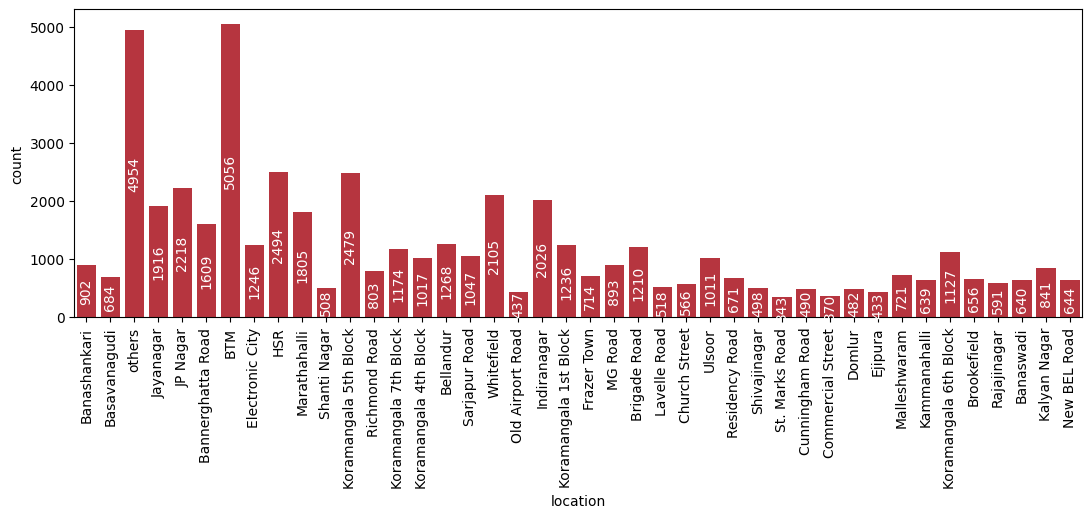

In [41]:
plt.figure(figsize=(13,4))
a=sns.countplot(x='location',data=df,color='#CB202D')
plt.xticks(rotation=90)
# plt.show()

def data_label(a):
  for i in a.containers:
    a.bar_label(i,rotation=90,label_type='center',color='white')
data_label(a)

By analysing the above data i can say that no.of restaurants in st. marks road,
commercial street, old airport road,shanti nagar, Domlur, Ejipura , shivajinagar,lavelle road  are less compared to other locations.

In [23]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,costfor2,type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,others,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,others,others,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,others,600,Buffet


# Count of Book table and online order

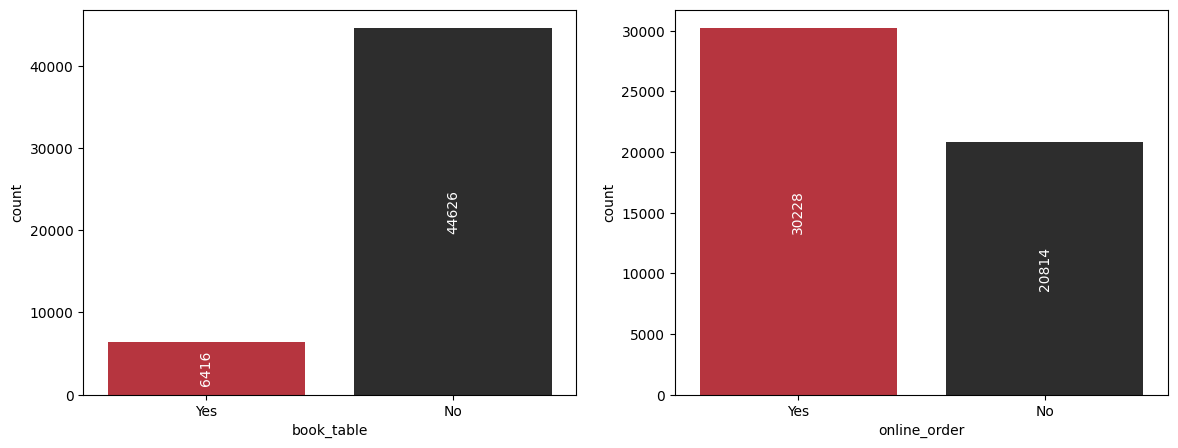

In [42]:
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(14,5))
a=sns.countplot(x='book_table',data=df,hue='book_table',palette=zomato_colors,ax=axes[0])
b=sns.countplot(x='online_order',data=df,hue='online_order',palette=zomato_colors,ax=axes[1])
data_label(a)
data_label(b)

By analysing above data i can say that Restaurants without book table facility are more and with online order facility are more.

# Analysing Book_table and online_order columns by rate

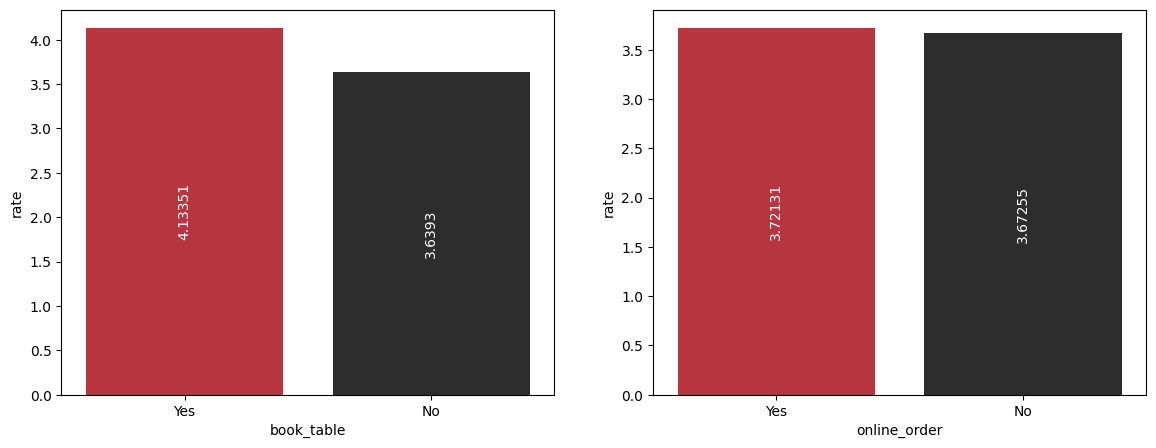

In [43]:
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(14,5))
a=sns.barplot(x='book_table',y='rate',data=df,hue='book_table',errorbar=None,palette=zomato_colors,ax=axes[0])
b=sns.barplot(x='online_order',y='rate',data=df,hue='online_order',errorbar=None,palette=zomato_colors,ax=axes[1])
data_label(a)
data_label(b)

By analyzing the above data i can say that the restaurants with book_table and online order facility are having highest rating compared to others.

In [26]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,costfor2,type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,others,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,others,others,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,others,600,Buffet


# Analysing Book_table and online_order columns by votes

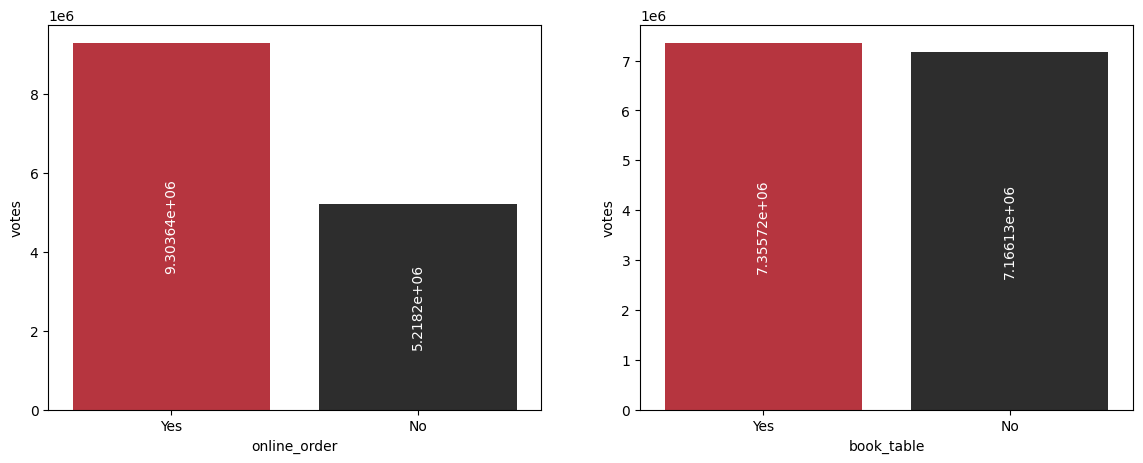

In [44]:
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(14,5))
v=df.groupby('online_order')['votes'].sum().sort_values(ascending=False)
v=pd.DataFrame(v)
a=sns.barplot(x='online_order',y='votes',data=v,hue='online_order',palette=zomato_colors,ax=axes[0])
data_label(a)


v1=df.groupby('book_table')['votes'].sum().sort_values(ascending=False)
v1=pd.DataFrame(v1)
b=sns.barplot(x='book_table',y='votes',data=v1,hue='book_table',palette=zomato_colors,ax=axes[1])
data_label(b)


By analyzing the above data i can say that the restaurants with book_table and online order facility are having highest votes compared to others.

In [28]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,costfor2,type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,others,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,others,others,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,others,600,Buffet


# visualizing online order facility location wise

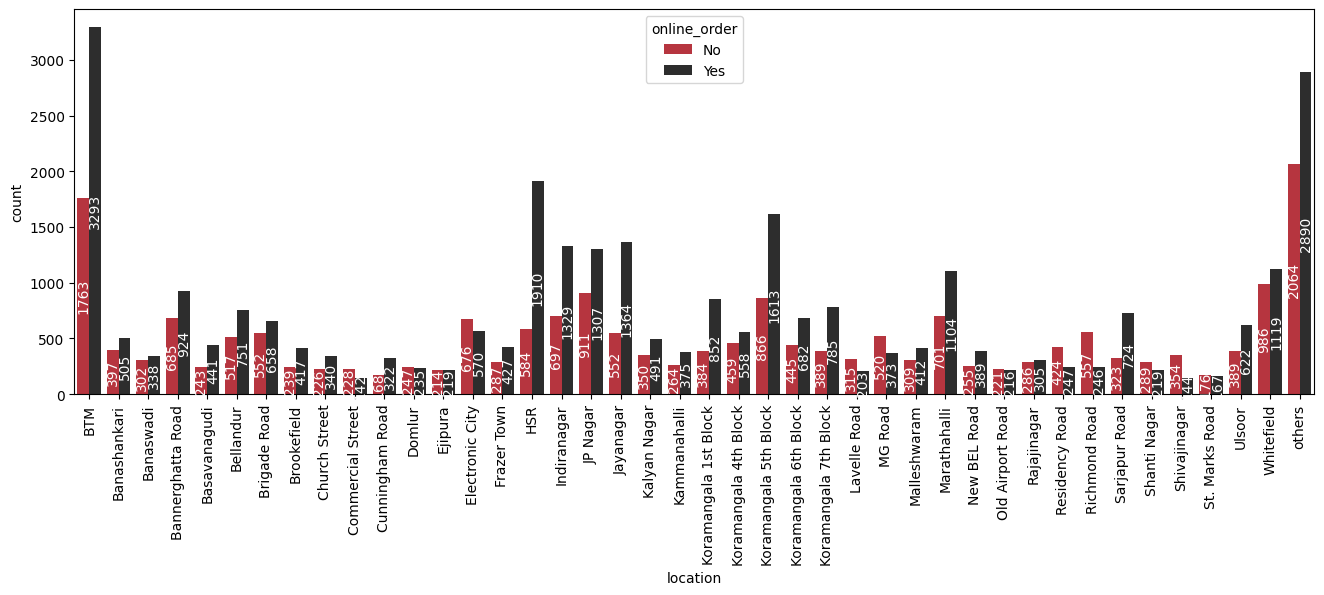

In [45]:
order_count = df.groupby(['location','online_order']).size().reset_index(name='count')
plt.figure(figsize=(16,5))
p=sns.barplot(x='location',y='count',data=order_count,hue='online_order',palette=zomato_colors)
plt.xticks(rotation=90)
data_label(p)
plt.show()

By analysing the above data i can say that online order facility is less in these locations: commercial street, Domlur, Lavelle Road, MG Road, old airport road, Residency road, Richmond Road, Shanthi nagar, shivaji nagar, st.marks road

# visualizing Book table facility location wise

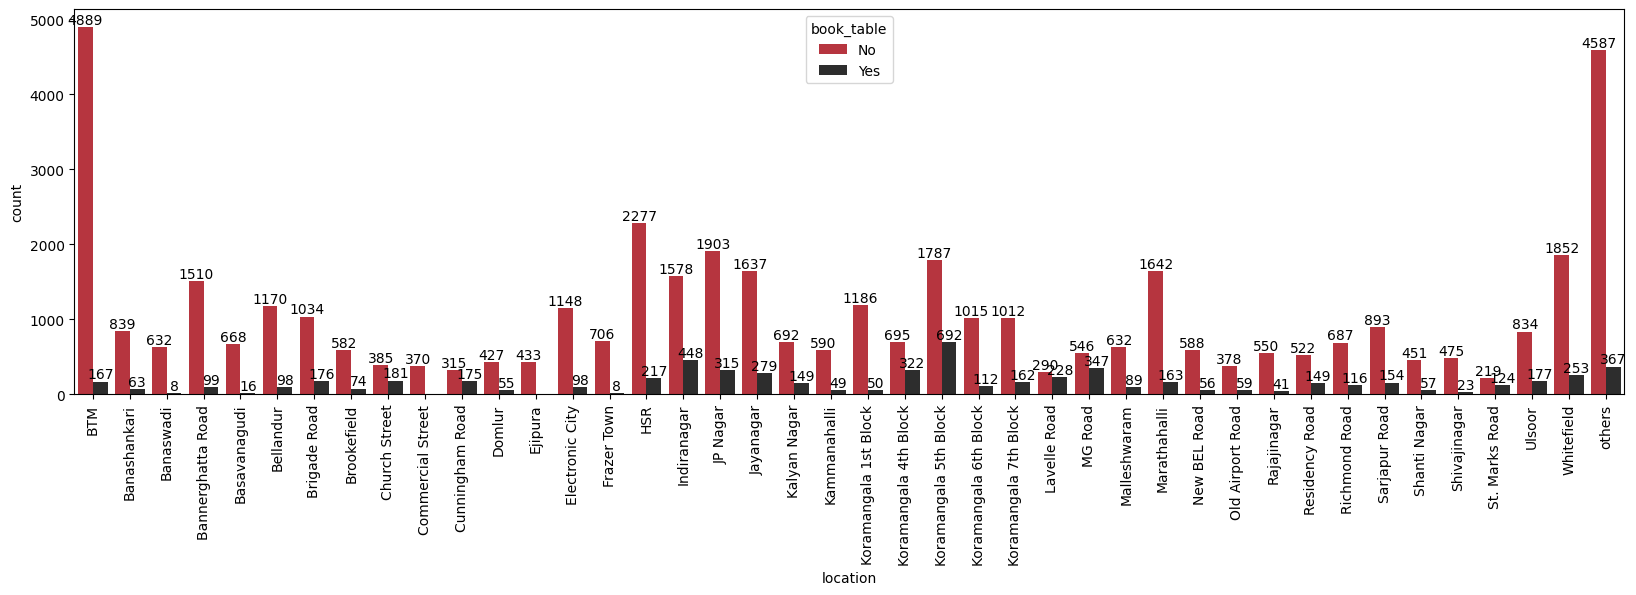

In [50]:
book_table_count= df.groupby(['location','book_table']).size().reset_index(name='count')
plt.figure(figsize=(20,5))
p=sns.barplot(x='location',y='count',data=book_table_count,hue='book_table',palette=zomato_colors)
for i in p.containers:
  p.bar_label(i)
plt.xticks(rotation=90)
# data_label(p)
plt.show()

By analysing the above data i can say that  restaurants in most of the locations are not providing book_table facility.

In [31]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,costfor2,type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,others,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,others,others,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,others,600,Buffet


# Visualizing Rate by type of restaurant

<ipython-input-52-fb4e4c84e789>:2: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#CB202D'` for the same effect.

  box_plt=sns.boxplot(x='type',y='rate',data=df,hue='type',color='#CB202D')


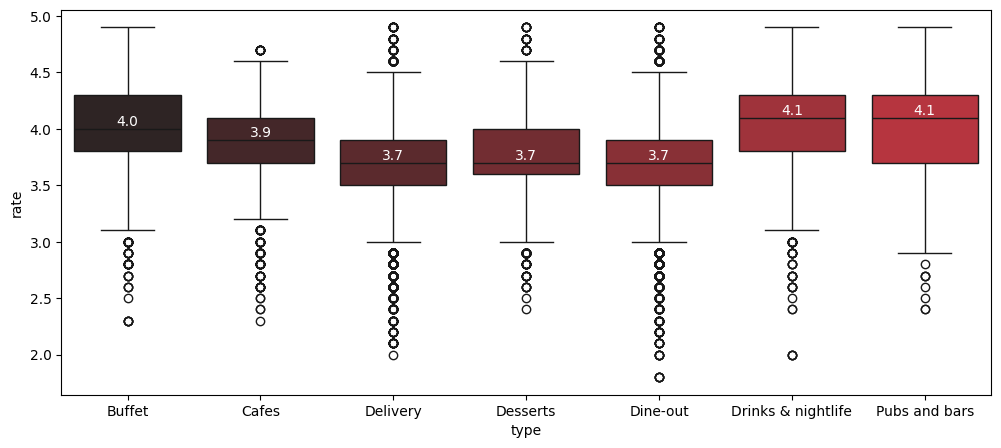

In [52]:
plt.figure(figsize=(12,5))
box_plt=sns.boxplot(x='type',y='rate',data=df,hue='type',color='#CB202D')
for i,box in enumerate(box_plt.patches):
  median=df['rate'][df['type']==df['type'].unique()[i]].median()
  plt.text(i,median,f'{median:.1f}',ha='center',va='bottom',color='white')

By analysing the above data i can say that restaurant types such as Drinks & night life, pubs and bars and buffet are having highest ratings compared to others

# visualizing restaurant_types "Drinks & nightlife", "Pubs and bars"  location wise

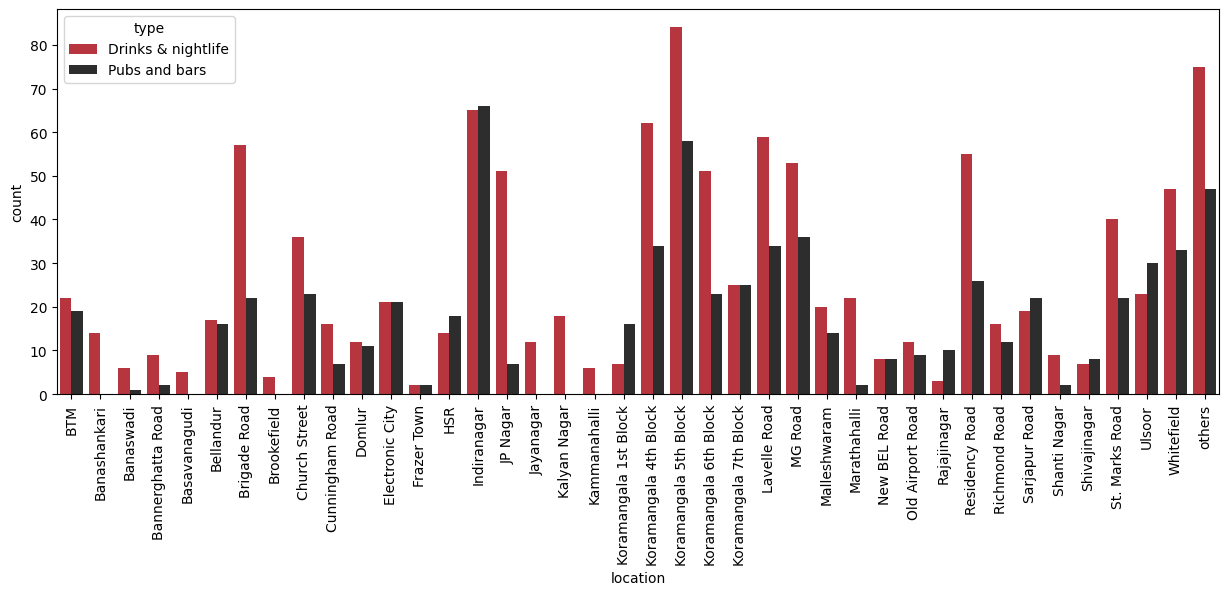

In [53]:
v=df.groupby(['location','type']).size().reset_index(name='count')
v=v[(v['type']=='Drinks & nightlife')|(v['type']=='Pubs and bars')]
plt.figure(figsize=(15,5))
sns.barplot(x='location',y='count',hue='type',data=v,palette=zomato_colors)
plt.xticks(rotation=90)
plt.show()

By analysing the above data i can say that


**pubs & bars** count is less in Banashankari, Banaswadi, Brookefield, Jayanagar, Kammanahalli, Marathahalli, shanthi nagar

**Drinks and night** life count is less in Banaswadi, Brookefield, Basavanagudi, Frazer town, kammanahalli, Rajajinagar, shivajinagar

# Visualizing votes by cuisine

<ipython-input-54-0f973c14f18d>:5: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#CB202D'` for the same effect.

  p=sns.barplot(x='cuisines',y='votes',data=v,hue='cuisines',color='#CB202D')


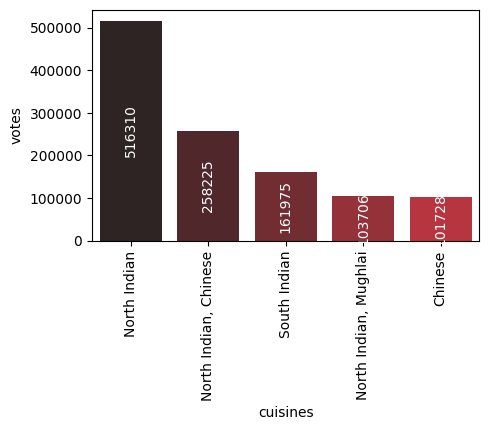

In [54]:
v=df.groupby(['cuisines'])['votes'].sum().sort_values(ascending=False)
v=pd.DataFrame(v)
v=v[1:].head()
plt.figure(figsize=(5,3))
p=sns.barplot(x='cuisines',y='votes',data=v,hue='cuisines',color='#CB202D')
data_label(p)
plt.xticks(rotation=90)
plt.show()

By analysing the above data i can say that more people in banglore had voted for north indian , chinese and south indian cuisines.

# visualizing costfor2 people by location

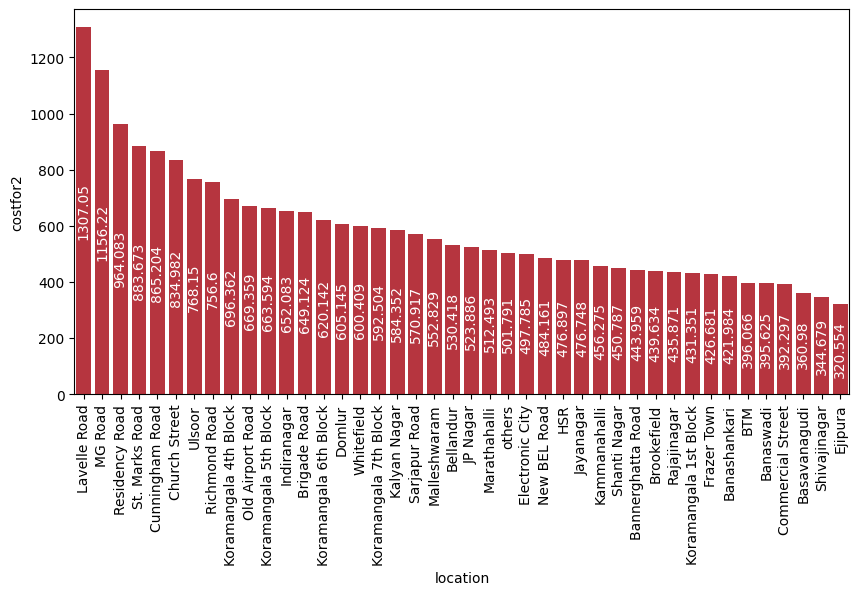

In [56]:
cost_loc=df.groupby('location')['costfor2'].mean().sort_values(ascending=False)
cost_loc=pd.DataFrame(cost_loc)
cost_rest_type=df.groupby('rest_type')['costfor2'].mean().sort_values(ascending=False)
cost_rest_type=pd.DataFrame(cost_rest_type)

plt.figure(figsize=(10,5))
a=sns.barplot(x='location',y='costfor2',data=cost_loc,color='#CB202D')
data_label(a)
plt.xticks(rotation=90)
plt.show()

By analysing the above data i can say that Restaurants in Lavelle road, M. G Road, Residency road are costing more for 2 people.

and Restaurants in Ejipura, shivajinagar, and Basavanagudi are costing less.

# Conclusion:
# By analysing above data finally i can conclude that if we start a restaurant type of **"Drinks and night life or Pubs&bars"** with **online order and book table** facility with cuisines such as **North indian, chinese and south indian** in locations such as **st.marks road, commercial street, old airport road, shivajinagar , lavelle road, Domlur** with **approximate cost of 300Rs. (cost for 2 people)** we can see higher growth or profit.